Importamos las bibliotecas necesarias y cargamos el dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el dataset desde la URL
# Respuesta a la pregunta b): El dataset tiene 57 características, incluidas frecuencias de palabras y caracteres especiales.
url = 'spambase.data'

# Nombres de las columnas según el archivo spambase.names
columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
        'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
        'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
        'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
        'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
        'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
        'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
        'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
        'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
        'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
        'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
        'capital_run_length_longest', 'capital_run_length_total', 'is_spam']

# Cargar los datos
data = pd.read_csv(url, header=None, names=columns)

Dividir los datos en características (X) y etiquetas (y)

In [2]:

# Respuesta a la pregunta a): Elegimos Naive Bayes porque es eficaz para este tipo de problemas de clasificación
# donde los datos se pueden modelar como distribuciones probabilísticas simples.
X = data.drop(columns=['is_spam'])  # Características (frecuencia de palabras y otros factores)
y = data['is_spam']  # Etiquetas (spam o no spam)

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entremaos el modelo Naive Bayes

In [3]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Realizar predicciones

In [4]:

y_pred = model.predict(X_test)

Calcular las métricas solicitadas

In [5]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Respuesta a la pregunta b): Las características que más influyen en la clasificación de un correo como spam incluyen
# palabras como 'free', 'money', 'business' y símbolos como '$', así como el uso de letras en mayúsculas o secuencias largas de caracteres.
# Estas características son comunes en correos no deseados y, por lo tanto, son fuertes indicadores.


Visualización de la Matriz de Confusión

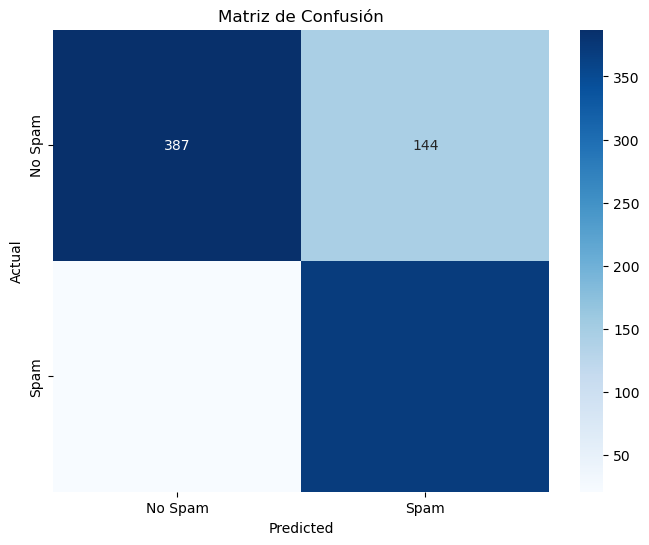

In [6]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Spam', 'Spam'], yticklabels=['No Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Matriz de Confusión')
plt.show()

Mostrar las métricas

In [7]:

print(f"Exactitud (Accuracy): {accuracy * 100:.2f}%")
print(f"Precisión: {precision * 100:.2f}%")
print(f"Recall (Sensibilidad): {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Spam', 'Spam']))

# Respuesta a la pregunta c):
# - Exactitud (Accuracy): {accuracy * 100:.2f}% -> Proporción de predicciones correctas en general.
# - Precisión (Precision): {precision * 100:.2f}% -> De todos los correos predichos como spam, cuántos eran realmente spam.
# - Recall (Sensibilidad): {recall * 100:.2f}% -> De todos los correos que eran spam, cuántos fueron identificados correctamente.
# - F1-Score: {f1 * 100:.2f}% -> Combina la precisión y el recall en una métrica equilibrada.
# En este caso, la métrica más importante es el **F1-Score** porque balancea la precisión (evitar falsos positivos) y el recall (evitar falsos negativos).

Exactitud (Accuracy): 82.08%
Precisión: 71.93%
Recall (Sensibilidad): 94.62%
F1-Score: 81.73%

Reporte de Clasificación:
               precision    recall  f1-score   support

     No Spam       0.95      0.73      0.82       531
        Spam       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921

